In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf


In [38]:
# READ stock dataset
AAPL_stock = pd.read_csv('../datas/PCAR_stock.csv')
print(AAPL_stock.columns)
AAPL_stock

Index(['date_time', 'symbol', 'high', 'low', 'open', 'close', 'adj_close',
       'volume'],
      dtype='object')


,date_time,symbol,high,low,open,close,adj_close,volume
0,1980-03-17,PCAR,0.849233,0.834269,0.000000,0.834269,0.242964,126968
1,1980-03-18,PCAR,0.815563,0.800599,0.000000,0.800599,0.233158,360855
2,1980-03-19,PCAR,0.804340,0.789375,0.000000,0.789375,0.229890,213840
3,1980-03-20,PCAR,0.748223,0.733259,0.000000,0.733259,0.213547,400950
4,1980-03-21,PCAR,0.755705,0.740741,0.000000,0.740741,0.215726,173745
...,...,...,...,...,...,...,...,...
10909,2023-06-23,PCAR,78.589996,76.930000,77.660004,78.440002,78.440002,2588900
10910,2023-06-26,PCAR,79.760002,78.580002,78.860001,79.209999,79.209999,1782900
10911,2023-06-27,PCAR,80.410004,78.919998,79.449997,80.360001,80.360001,1759500
10912,2023-06-28,PCAR,80.779999,79.949997,80.360001,80.680000,80.680000,1817600


In [39]:
AAPL_stock['date_time'] = pd.to_datetime(AAPL_stock['date_time'])
AAPL_stock = AAPL_stock.set_index('date_time')

           symbol       high        low       open      close  adj_close  \
date_time                                                                  
2023-06-15   PCAR  79.230003  77.720001  78.279999  79.080002  79.080002   
2023-06-16   PCAR  79.440002  78.470001  79.440002  78.629997  78.629997   
2023-06-20   PCAR  78.349998  76.879997  78.250000  77.769997  77.769997   
2023-06-21   PCAR  78.830002  77.089996  77.650002  78.519997  78.519997   
2023-06-22   PCAR  78.550003  77.629997  78.500000  78.110001  78.110001   
2023-06-23   PCAR  78.589996  76.930000  77.660004  78.440002  78.440002   
2023-06-26   PCAR  79.760002  78.580002  78.860001  79.209999  79.209999   
2023-06-27   PCAR  80.410004  78.919998  79.449997  80.360001  80.360001   
2023-06-28   PCAR  80.779999  79.949997  80.360001  80.680000  80.680000   
2023-06-29   PCAR  83.269997  80.639999  80.989998  82.610001  82.610001   

             volume  
date_time            
2023-06-15  1792200  
2023-06-16  3946800  

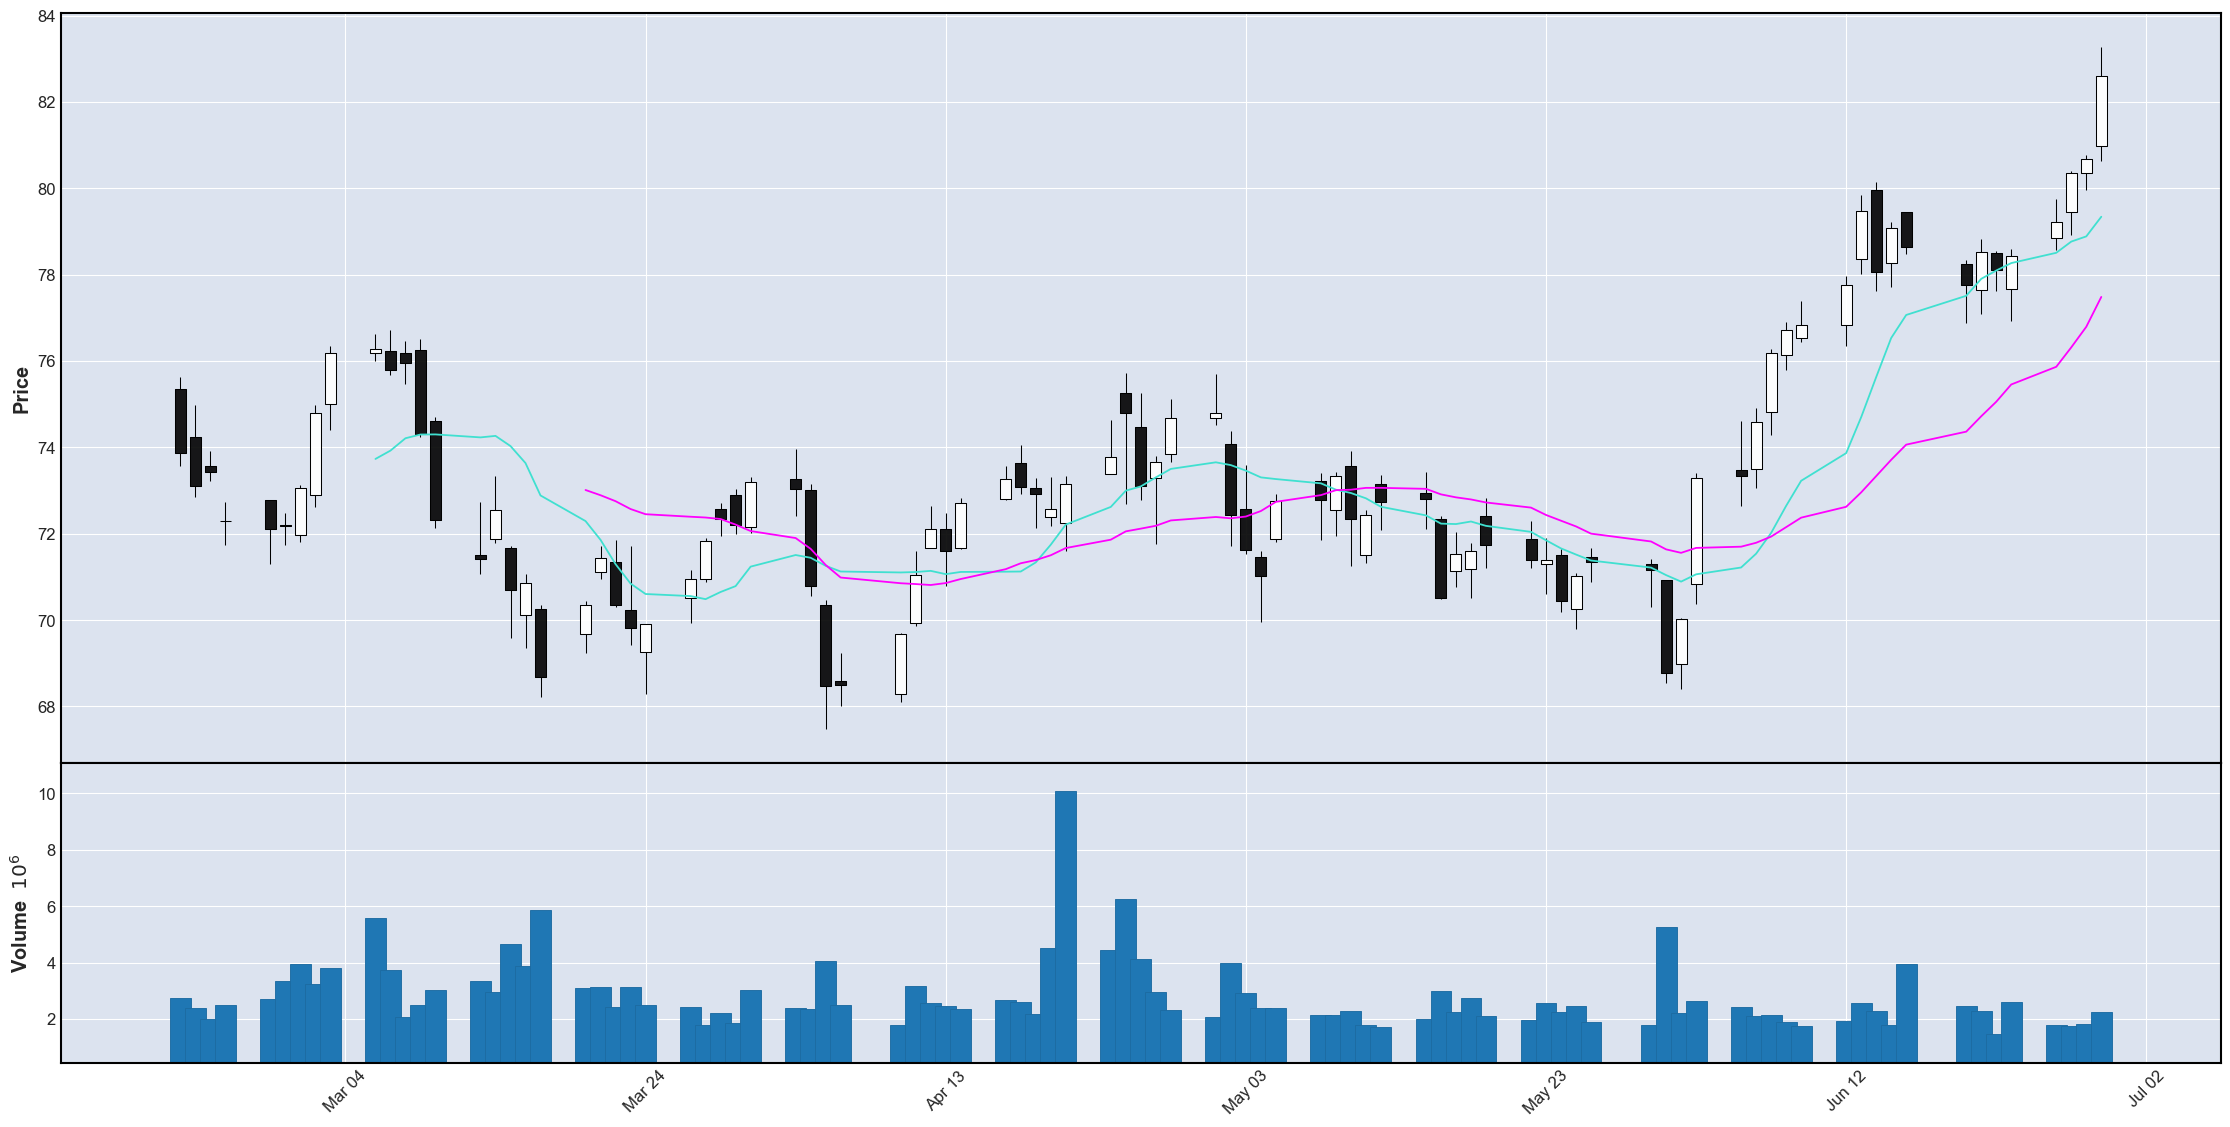

In [40]:
print(AAPL_stock.tail(10))
mpf.plot(AAPL_stock[-90:],type='candle', mav=(10,20), volume = True, show_nontrading=True, figsize=(30,15))

In [41]:
import numpy as np
AAPL_stock['LogReturns'] = np.log(AAPL_stock['close']/AAPL_stock['close'].shift(1))
AAPL_stock = AAPL_stock.dropna()
AAPL_stock


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,symbol,high,low,open,close,adj_close,volume,LogReturns
date_time,,,,,,,,
1980-03-18,PCAR,0.815563,0.800599,0.000000,0.800599,0.233158,360855,-0.041196
1980-03-19,PCAR,0.804340,0.789375,0.000000,0.789375,0.229890,213840,-0.014119
1980-03-20,PCAR,0.748223,0.733259,0.000000,0.733259,0.213547,400950,-0.073742
1980-03-21,PCAR,0.755705,0.740741,0.000000,0.740741,0.215726,173745,0.010152
1980-03-24,PCAR,0.740741,0.725776,0.000000,0.725776,0.211368,441045,-0.020410
...,...,...,...,...,...,...,...,...
2023-06-23,PCAR,78.589996,76.930000,77.660004,78.440002,78.440002,2588900,0.004216
2023-06-26,PCAR,79.760002,78.580002,78.860001,79.209999,79.209999,1782900,0.009769
2023-06-27,PCAR,80.410004,78.919998,79.449997,80.360001,80.360001,1759500,0.014414


In [42]:
mean_log_return = AAPL_stock['LogReturns'].mean()
mean_log_return

0.00042108770713767004

In [43]:
AAPL_stock['squared_deviation'] = AAPL_stock['LogReturns'].map(lambda x: (x-mean_log_return)**2)


In [44]:
total = AAPL_stock['squared_deviation'].sum()
total

4.5795818961653065

In [45]:
his = np.sqrt(252*total/(AAPL_stock.shape[0]-1))
his

0.32520783984654983

In [46]:
def get_Historical_Volatility(name, stock:pd.DataFrame):
    stock.reset_index(inplace=True)

    stock['LogReturns'] = np.log(stock['close']/stock['close'].shift(1))
    stock = stock.dropna()
    mean_log_return = np.mean(stock['LogReturns'])
    stock.loc[:, 'squared_deviation'] = stock['LogReturns'].map(lambda x: (x - mean_log_return) ** 2).copy()
    total = stock['squared_deviation'].sum()
    hv = np.sqrt(252*total/(stock.shape[0]-1))
    print(stock)
    return (name ,hv)

In [47]:
def calculate_volatility(name ,data: pd.DataFrame):
    # Calculate the daily logarithmic returns
    data['LogReturns'] = np.log(data['close']/data['close'].shift(1))
    
    # Calculate the mean log return
    mean_log_return = np.mean(data['LogReturns'])
    
    # Calculate the squared deviation using .loc accessor and avoid the SettingWithCopyWarning
    data.loc[:, 'squared_deviation'] = data['LogReturns'].map(lambda x: (x - mean_log_return) ** 2).copy()
    
    # Reset the index
    total = data['squared_deviation'].sum()
    hv = np.sqrt(22*total/(data.shape[0]-1))
    return (name,hv)

# Sample usage
# Assuming you have a DataFrame named 'df' with a 'Close' column containing daily closing prices
# result = calculate_volatility(stock)
# print(result)

In [62]:
small_volatility_stock = []
medium_volatility_stock = []
big_volatility_stock = []
company=[]
volatility = []
n=10
stocks = pd.read_csv('../datas/postgres_public_stock_data.csv')
for sym in stocks['symbol'].unique():
    stock =  pd.read_csv(f'../datas/{sym}_stock.csv')
    # if stock.shape[0]<252*n:
    #     print(sym)
    #     continue
    name, vol = (calculate_volatility(sym, stock))
    print(name, vol)
    company.append(name)
    volatility.append(vol) 
    if vol <= 0.1:
        small_volatility_stock.append([name,vol])
    elif (vol >0.1) and (vol<=0.2):
        medium_volatility_stock.append([name,vol])
    else:
        big_volatility_stock.append([name,vol])



/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

PEP 0.20888566898850108
AMD 0.17716670097785145
AVGO 0.10447033038664527
TXN 0.11154212690660593
COST 0.0939662026283399
QCOM 0.1433422147893886
TMUS 0.1289751934070973


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

AMGN 0.11257964109307834
CHTR 0.08560936157724011
SBUX 0.11161657210432267
INTU 0.13697679269785676
AMAT 0.14221620852812833
ISRG 0.14528938435880528
ILMN 0.17951968844335908
MU 0.1793680739608009
BKNG 0.18615343285915872


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

MDLZ 0.06846173985964163
GILD 0.14095878423656893
ADP 0.07815489921592343
FISV 0.03920666834740878
VRTX 0.16462046543690287
ATVI 0.15274947274791545
CSX 0.09095535507576369
ADSK 0.1364798116538841
REGN 0.19086902928971422


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

MELI 0.16719774213136457
ADI 0.129177093412852
BIIB 0.1698914954091416
AAPL 0.13406622802383755
MSFT 0.1002949727210114
AMZN 0.16652150312487546
GOOG 0.0905754290203199
GOOGL 0.09051206195477908
TSLA 0.16851579582703882


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

NVDA 0.17841358507560923
PYPL 0.11485141345533789
ADBE 0.14465909728392035
INTC 0.11783199209741735
CMCSA 0.10481378603144162
NFLX 0.16929157942378217
CSCO 0.11816365143016917
LRCX 0.1652918240247929
NXPI 0.12700276636783256


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

WBA 0.0851189159301913
ASML 0.14383919902472467
KHC 0.0858236247316216
MAR 0.10299498159725322
EA 0.13998055760902178
BIDU 0.15119672169482765
KLAC 0.15139213683500358
JD 0.1412505113042365
MNST 0.22311803927360876
WDC 0.1779774013912856


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

EXC 0.0717227733704401
CTSH 0.14142025053801804
ORLY 0.09927127715027927
WDAY 0.11616027847741098
XEL 0.06737643043520704
NTES 0.16881214542293146
CTAS 0.08938252530689046


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

SNPS 0.19058844123546637
DXCM 0.1630021292426598
PAYX 0.10138278801896043
VRSK 0.06608282952266144
ANSS 0.12431964002556775
CDNS 0.14174396106841167
SIRI 0.22724268883499005
FAST 0.10708019566706807


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

CPRT 0.11366241247003978
SWKS 0.18707143237320117
DLTR 0.12444568528895361
SGEN 0.1547987828789067
IDXX 0.12448095919819387
VRSN 0.163979743543844


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

PCAR 0.09608424407118729
INCY 0.19026715796028829
CDW 0.08471628423349954
CHKP 0.14970613589248646
ULTA 0.14018355026656285
TTWO 0.15494830951575006
FOXA 0.10532472945181355
LULU 0.14899853474895236
MCHP 0.14146281569145913
NTAP 0.17000637222814463
TCOM 0.15075756410487118
EXPE 0.140000367466649
BMRN 0.15035429665277175
XRAY 0.10350706854439105
UAL 0.1926726267296276
SPLK 0.1405833078705336
ALGN 0.17870559520105275


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

In [63]:
print(len(small_volatility_stock),len(medium_volatility_stock),len(big_volatility_stock))

17 71 3


In [64]:
print(small_volatility_stock)


[['COST', 0.0939662026283399], ['CHTR', 0.08560936157724011], ['MDLZ', 0.06846173985964163], ['ADP', 0.07815489921592343], ['FISV', 0.03920666834740878], ['CSX', 0.09095535507576369], ['GOOG', 0.0905754290203199], ['GOOGL', 0.09051206195477908], ['WBA', 0.0851189159301913], ['KHC', 0.0858236247316216], ['EXC', 0.0717227733704401], ['ORLY', 0.09927127715027927], ['XEL', 0.06737643043520704], ['CTAS', 0.08938252530689046], ['VRSK', 0.06608282952266144], ['PCAR', 0.09608424407118729], ['CDW', 0.08471628423349954]]


In [65]:
print(medium_volatility_stock)

[['AMD', 0.17716670097785145], ['AVGO', 0.10447033038664527], ['TXN', 0.11154212690660593], ['QCOM', 0.1433422147893886], ['TMUS', 0.1289751934070973], ['AMGN', 0.11257964109307834], ['SBUX', 0.11161657210432267], ['INTU', 0.13697679269785676], ['AMAT', 0.14221620852812833], ['ISRG', 0.14528938435880528], ['ILMN', 0.17951968844335908], ['MU', 0.1793680739608009], ['BKNG', 0.18615343285915872], ['GILD', 0.14095878423656893], ['VRTX', 0.16462046543690287], ['ATVI', 0.15274947274791545], ['ADSK', 0.1364798116538841], ['REGN', 0.19086902928971422], ['MELI', 0.16719774213136457], ['ADI', 0.129177093412852], ['BIIB', 0.1698914954091416], ['AAPL', 0.13406622802383755], ['MSFT', 0.1002949727210114], ['AMZN', 0.16652150312487546], ['TSLA', 0.16851579582703882], ['NVDA', 0.17841358507560923], ['PYPL', 0.11485141345533789], ['ADBE', 0.14465909728392035], ['INTC', 0.11783199209741735], ['CMCSA', 0.10481378603144162], ['NFLX', 0.16929157942378217], ['CSCO', 0.11816365143016917], ['LRCX', 0.16529182

In [66]:
print(big_volatility_stock)

[['PEP', 0.20888566898850108], ['MNST', 0.22311803927360876], ['SIRI', 0.22724268883499005]]


In [60]:
test =  pd.read_csv(f'../datas/AAPL_stock.csv')
print(calculate_volatility('AAPL', test))


('AAPL', 0.13406622802383755)


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
#GOOGL=0.3, 'AAPL'=0.45, PEP=0.6